# Daily Challenge: Exploring the World Happiness Report with Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

Your Task

Your objective is to delve into the World Happiness Report dataset, which includes columns like Country, Year, Happiness_Score, GDP_per_Capita, Social_Support, Healthy_Life_Expectancy, Freedom_to_Make_Life_Choices, Generosity, and Perceptions_of_Corruption.

    1. Load and Inspect Data:
        Utilize pandas to load the World Happiness Report Dataset.
        Examine the data to grasp its structure and contents of the year 2019.

    2. Data Preprocessing:
        Address missing values and adjust data types as necessary.

    3. Social Support and Happiness:
        Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

    4. Regional Comparisons of GDP and Health:
        Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
        Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.




In [2]:
data = pd.read_csv(r"2019.csv")
data= pd.DataFrame(data)
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Let's see if there are any dulplicates:

In [3]:
print(len(data))
data = data.drop_duplicates()
print(len(data))

156
156


There were no duplicates

What about missing values?

In [4]:
null_data = data[data.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


Also, no missing values. Looks fine. Most of the columns are numerical as well.

Now I want to find the relationship between "Score" and "Social support":

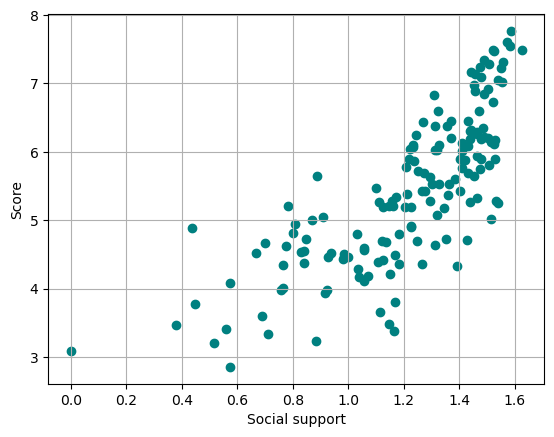

In [5]:
plt.scatter(data["Social support"],data["Score"], color = 'teal')
plt.grid()
plt.ylabel("Score")
plt.xlabel("Social support")
#plt.yscale('log')
plt.show()

According to this research, the higher the social support, the higher scores of happiness the country reports. It's worth noting that it would seem like at certain point, a small increase in social support results in a big difference in reported happiness. 

In [6]:
!pip install pycountry_convert 



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pycountry_convert as pc

def country_to_continent(country_name):
    if country_name == "Trinidad & Tobago":
        return "South America"
    elif country_name == "Kosovo":
        return "Europe"
    elif country_name == "Palestinian Territories":
        return "Asia"
    elif country_name == 'Congo (Brazzaville)' or country_name == 'Congo (Kinshasa)':
        return "Africa"
    else:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name

data['Region'] = [country_to_continent(i) for i in data["Country or region"]]


In [8]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [9]:
data_region = data.groupby('Region').agg({'GDP per capita': 'mean', 'Healthy life expectancy': 'mean'}).reset_index()
data_region

,Region,GDP per capita,Healthy life expectancy
0,Africa,0.498467,0.444467
1,Asia,0.980283,0.767848
2,Europe,1.219900,0.919800
3,North America,0.929167,0.825333
4,Oceania,1.337500,1.031000
5,South America,1.005273,0.823455


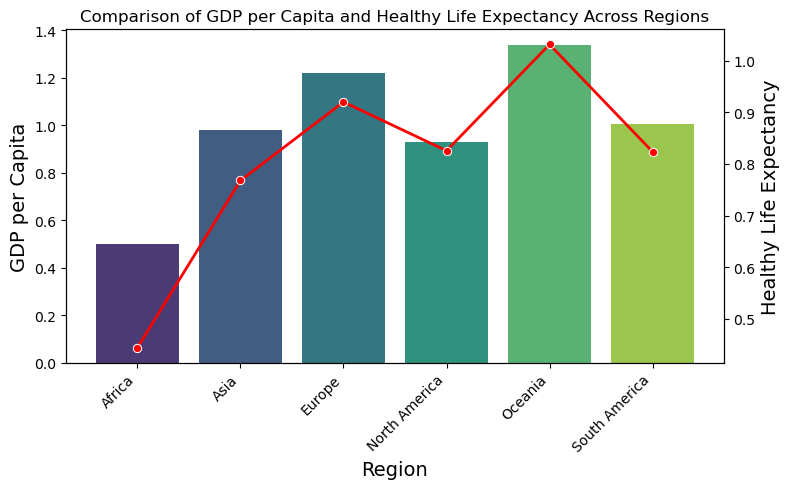

In [20]:
fig, ax1 = plt.subplots( figsize=(8, 5))

sns.barplot(x='Region', y='GDP per capita', data=data_region, ax=ax1, palette='viridis')
ax1.set_xlabel('Region', fontsize=14)
ax1.set_ylabel('GDP per Capita', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax2 = ax1.twinx()
sns.lineplot(x='Region', y='Healthy life expectancy', data=data_region, ax=ax2, color='r', marker='o', linewidth=2)
ax2.set_ylabel('Healthy Life Expectancy', fontsize=14)
ax2.set_xlabel('Region', fontsize=14)

plt.title('Comparison of GDP per Capita and Healthy Life Expectancy Across Regions')
plt.tight_layout()
plt.show()